In [591]:
#IMPORT NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [592]:
#READ DATA
df=pd.read_csv(r"day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [593]:
#Check columns present in dataset
print(df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [594]:
#Get basic idea of data using describe()
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [595]:
#checking for null values in dataset
count=df.isnull().sum()
print(count)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [596]:
#checking for datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [597]:
#from the given data we can see that instant is an index column so we drop it
df.drop(['instant'],axis=1,inplace=True)

In [598]:
df.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [599]:
#we can see column dteday and yr month are having same data so we can drop dteday to avoid confusion

df.drop(['dteday'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [600]:
#we know that casual+registered=cnt and cnt is our target variable so we will not consider casual and registered
df.drop(['casual','registered'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [601]:
#check for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [602]:
#from data we can see that: season,yr,mnth,holiday,weekday,workingday,weathersit all are categorical variables
#We will replace season,weekday and weathersit with appropriate values

In [603]:
df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [604]:
df['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,6,0,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,0,0,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,1,1,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,2,1,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,3,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [605]:
df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,Saturday,0,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,Sunday,0,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,Monday,1,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,Tuesday,1,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,Wednesday,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [606]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [607]:
#changing datatypes of numerical columns to appropriate types

df[['temp','atemp','hum','windspeed','cnt']]=df[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)

In [608]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [609]:
#Performing EDA

# 1)PAIRPLOTS TO UNDERSTAND NUMERICAL VARIABLES

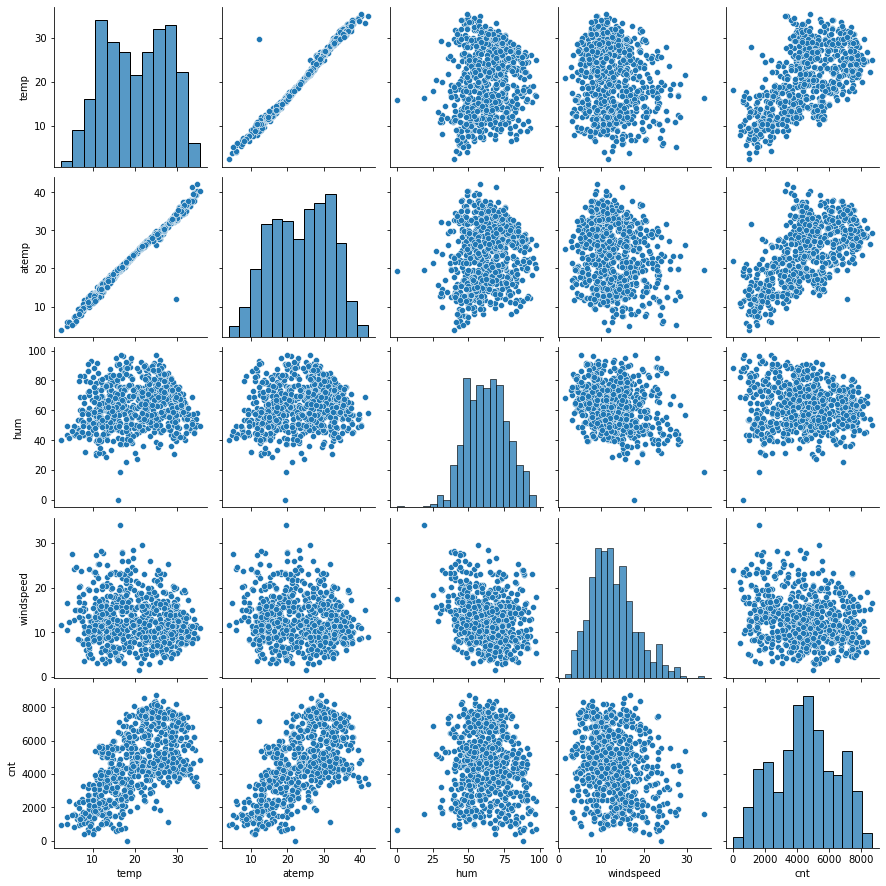

In [610]:
sns.pairplot(df, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

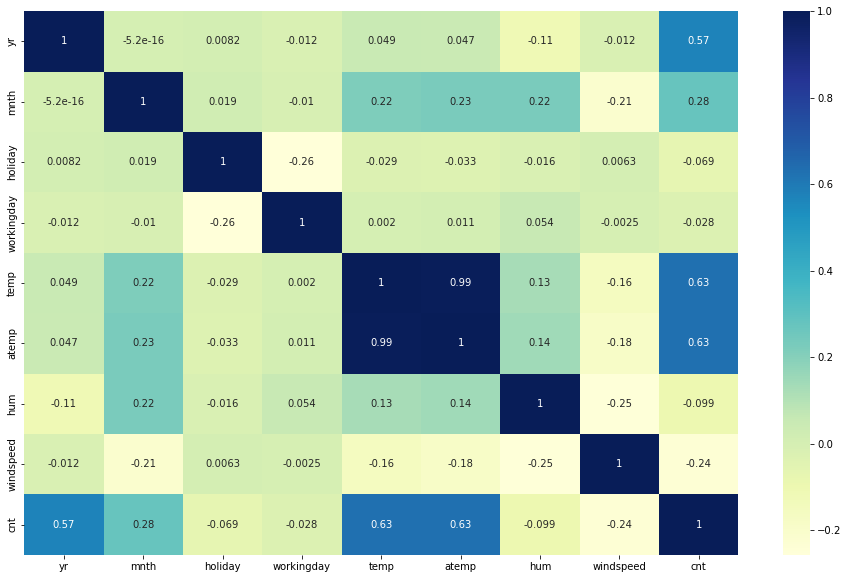

In [611]:
# from above graphs we can say that temp and atemp have a relationship
#let check the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [612]:
#correlation between temp and atemp is 0.99 which is almost 1
#Let us drop temp and consider atemp

df.drop(['temp'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,Monday,1,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,1600


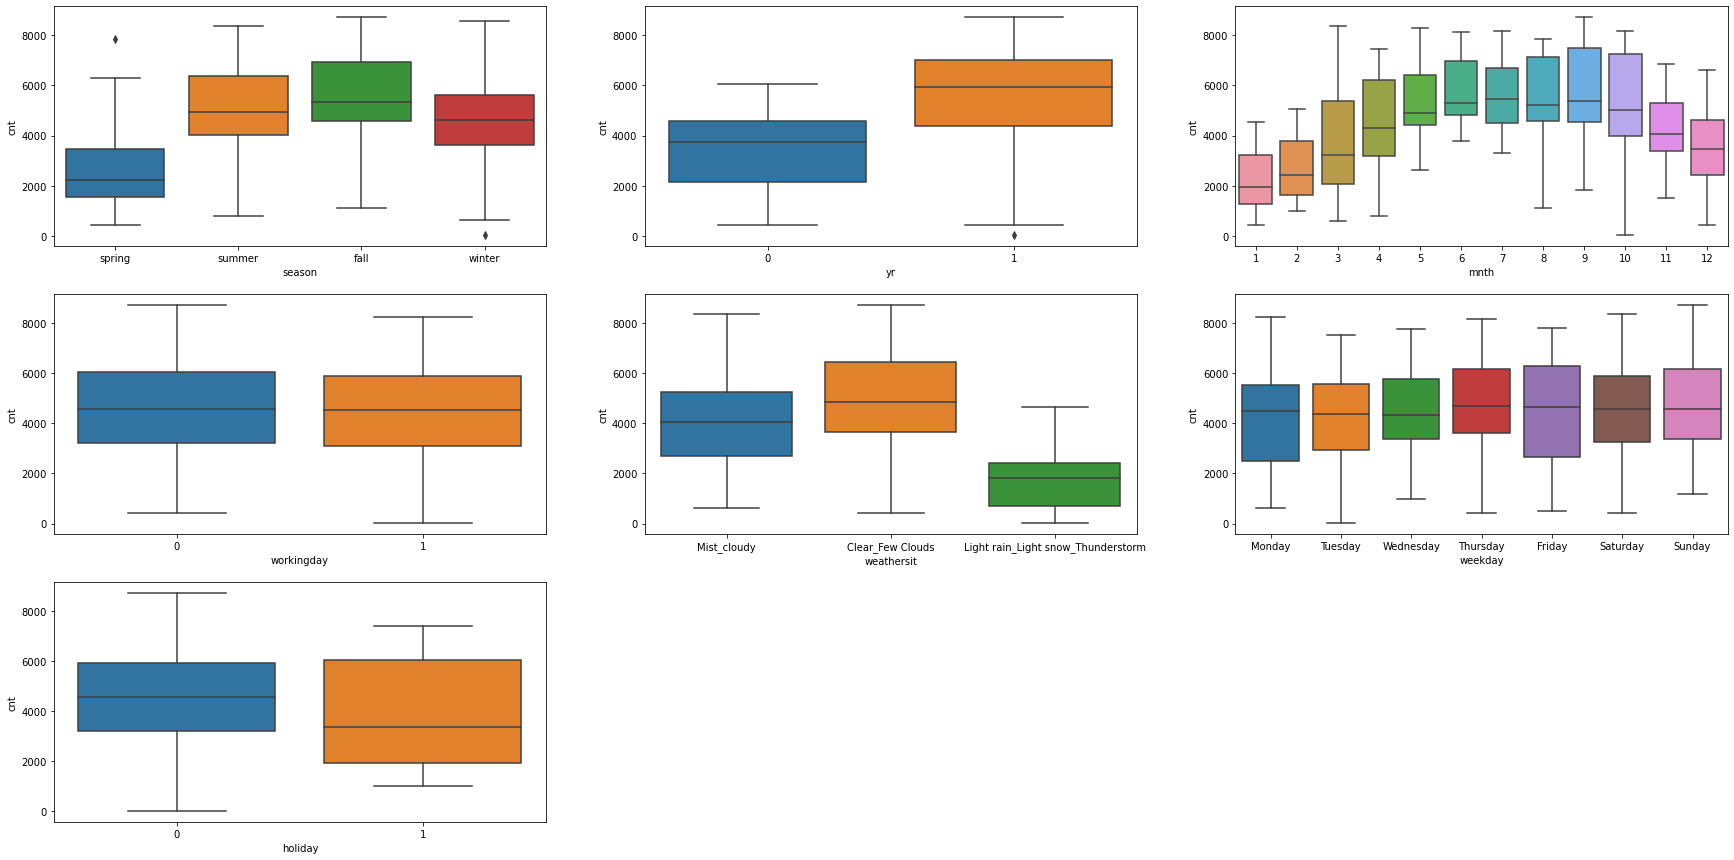

In [613]:
#Visualising categorical Variables to understand data better
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)#yr','mnth','workingday','weathersit','weekday'
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.show()

#### Creating Dummy Variables

In [614]:
#Convert variables to object type
df['mnth']=df['mnth'].astype(object)
df['season']=df['season'].astype(object)
df['weathersit']=df['weathersit'].astype(object)
df['weekday']=df['weekday'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [615]:
#CREATING DUMMY VARIABLES FOR CATEGORICAL DATA 

Season_condition=pd.get_dummies(df['season'],drop_first=True)
Weather_condition=pd.get_dummies(df['weathersit'],drop_first=True)
Day_of_week=pd.get_dummies(df['weekday'],drop_first=True)
Month=pd.get_dummies(df['mnth'],drop_first=True)

In [616]:
df=pd.concat([df,Season_condition],axis=1)
df=pd.concat([df,Weather_condition],axis=1)
df=pd.concat([df,Day_of_week],axis=1)
df=pd.concat([df,Month],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              730 non-null    object 
 1   yr                                  730 non-null    int64  
 2   mnth                                730 non-null    object 
 3   holiday                             730 non-null    int64  
 4   weekday                             730 non-null    object 
 5   workingday                          730 non-null    int64  
 6   weathersit                          730 non-null    object 
 7   atemp                               730 non-null    float64
 8   hum                                 730 non-null    float64
 9   windspeed                           730 non-null    float64
 10  cnt                                 730 non-null    int64  
 11  spring                              730 non-n

In [617]:
#Deleting the orginal columns season.weathersit,weekday,mnth
df.drop(['season'],axis=1,inplace=True)
df.drop(['weathersit'],axis=1,inplace=True)

df.drop(['weekday'],axis=1,inplace=True)

df.drop(['mnth'],axis=1,inplace=True)


df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [618]:
#Now are data is ready to split
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [619]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,1,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [620]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,0,22.85230,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,0,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [621]:
df_train.columns

Index([                                'yr',
                                  'holiday',
                               'workingday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                      'cnt',
                                   'spring',
                                   'summer',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'Monday',
                                 'Saturday',
                                   'Sunday',
                                 'Thursday',
                                  'Tuesday',
                                'Wednesday',
                                          2,
                                          3,
                                          4,
                                          5,
          

In [622]:
#SCALING THE NUMERICAL DATA
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [623]:
num_vars=['atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [624]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [625]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.453386,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [626]:
#CREATING X AND Y
y_train = df_train.pop('cnt')
X_train = df_train

In [627]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light rain_Light snow_Thunderstorm,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [628]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [629]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [630]:
#USING RFE APPROACH FOR FEATURE SELECTION
# WE START WITH 15 VARS AND WILL USE MIXED APPROACH TO BUILD A MODEL

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 15)            
rfe = rfe.fit(X_train, y_train)

In [631]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 2),
 ('summer', False, 2),
 ('winter', True, 1),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', False, 2),
 ('Monday', False, 2),
 ('Saturday', False, 2),
 ('Sunday', False, 2),
 ('Thursday', False, 2),
 ('Tuesday', False, 2),
 ('Wednesday', False, 2),
 (2, False, 2),
 (3, True, 1),
 (4, True, 1),
 (5, True, 1),
 (6, True, 1),
 (7, False, 2),
 (8, True, 1),
 (9, True, 1),
 (10, True, 1),
 (11, False, 2),
 (12, False, 2)]

In [632]:
col = X_train.columns[rfe.support_]
col

Index([                                'yr',
                                  'holiday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                                          3,
                                          4,
                                          5,
                                          6,
                                          8,
                                          9,
                                         10],
      dtype='object')

In [633]:
X_train.columns[~rfe.support_]

Index([ 'workingday',      'spring',      'summer', 'Mist_cloudy',
            'Monday',    'Saturday',      'Sunday',    'Thursday',
           'Tuesday',   'Wednesday',             2,             7,
                  11,            12],
      dtype='object')

In [634]:
X_train_rfe = X_train[col]

In [635]:
#BUILDING MODEL USING STATSMODEL:

import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [636]:
lm = sm.OLS(y_train,X_train_rfe1).fit()

In [637]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     170.8
Date:                Tue, 27 Dec 2022   Prob (F-statistic):          3.39e-179
Time:                        19:20:56   Log-Likelihood:                 488.12
No. Observations:                 510   AIC:                            -946.2
Df Residuals:                     495   BIC:                            -882.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [638]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.82
2,atemp,10.76
4,windspeed,3.82
5,winter,2.36
0,yr,2.03
11,8,1.76
13,10,1.62
10,6,1.58
9,5,1.49
12,9,1.43


In [639]:
X_train_rfe1.head()

,const,yr,holiday,atemp,hum,windspeed,winter,Light rain_Light snow_Thunderstorm,3,4,5,6,8,9,10
653,1.0,1,0,0.501133,0.575354,0.300794,1,0,0,0,0,0,0,0,1
576,1.0,1,0,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0.438975,0.640189,0.255342,0,0,1,0,0,0,0,0,0
728,1.0,1,0,0.200348,0.498067,0.663106,0,0,0,0,0,0,0,0,0
482,1.0,1,0,0.391735,0.504508,0.188475,0,0,0,1,0,0,0,0,0


In [640]:
#COLUMN hum HAS A VERY HIGH VIF SO WE DROP IT 
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [641]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [642]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit()

In [643]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     154.3
Date:                Tue, 27 Dec 2022   Prob (F-statistic):          8.26e-165
Time:                        19:20:57   Log-Likelihood:                 451.18
No. Observations:                 510   AIC:                            -874.4
Df Residuals:                     496   BIC:                            -815.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [644]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.39
3,windspeed,3.30
4,winter,2.05
0,yr,2.02
10,8,1.76
12,10,1.61
9,6,1.56
8,5,1.46
11,9,1.42
7,4,1.34


In [645]:
#COLUMN temp HAS A VERY HIGH VIF SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['atemp'],axis=1)

In [646]:
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     78.51
Date:                Tue, 27 Dec 2022   Prob (F-statistic):          1.86e-106
Time:                        19:20:57   Log-Likelihood:                 309.62
No. Observations:                 510   AIC:                            -593.2
Df Residuals:                     497   BIC:                            -538.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [647]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.67
3,winter,1.94
0,yr,1.84
11,10,1.57
5,3,1.29
6,4,1.28
9,8,1.17
7,5,1.16
8,6,1.15
10,9,1.10


In [648]:
X_train_rfe.columns

Index([                                'yr',
                                  'holiday',
                                'windspeed',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                                          3,
                                          4,
                                          5,
                                          6,
                                          8,
                                          9,
                                         10],
      dtype='object')

In [649]:
#Windspeed has high VIF >2 so we drop it
X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)

In [650]:
X_train_rfe3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     76.88
Date:                Tue, 27 Dec 2022   Prob (F-statistic):          7.02e-100
Time:                        19:20:57   Log-Likelihood:                 291.62
No. Observations:                 510   AIC:                            -559.2
Df Residuals:                     498   BIC:                            -508.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [651]:
#Winter has A VERY HIGH p-value WHUCH MEANS IT IS insignificant SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['winter'],axis=1)

In [652]:
X_train_rfe4 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     76.29
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           6.67e-94
Time:                        19:20:57   Log-Likelihood:                 275.09
No. Observations:                 510   AIC:                            -528.2
Df Residuals:                     499   BIC:                            -481.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [653]:
#cOLUMN 4 HAS A VERY HIGH p-value WHUCH MEANS IT IS insignificant SO WE DROP IT
X_train_rfe=X_train_rfe.drop([4],axis=1)

In [654]:
X_train_rfe5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     81.27
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           4.93e-92
Time:                        19:20:57   Log-Likelihood:                 268.35
No. Observations:                 510   AIC:                            -516.7
Df Residuals:                     500   BIC:                            -474.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [655]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.38
6,8,1.09
8,10,1.09
3,3,1.07
7,9,1.07
5,6,1.06
2,Light rain_Light snow_Thunderstorm,1.05
4,5,1.05
1,holiday,1.02


In [656]:
#ADDING SATURDAY AND CHECKING IF MODEL IMPROVES

X_train_rfe['Saturday']=X_train['Saturday']
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,3,5,6,8,9,10,Saturday
653,1,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0
426,1,0,0,1,0,0,0,0,0,0
728,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0,0,0,0,0,0


In [657]:
X_train_rfe6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     73.13
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           3.50e-91
Time:                        19:20:57   Log-Likelihood:                 268.62
No. Observations:                 510   AIC:                            -515.2
Df Residuals:                     499   BIC:                            -468.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [658]:
#Saturday has high p-value so we drop it
X_train_rfe=X_train_rfe.drop(['Saturday'],axis=1)

In [659]:
X_train_rfe7 = sm.add_constant(X_train_rfe)
lm7 = sm.OLS(y_train,X_train_rfe7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     81.27
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           4.93e-92
Time:                        19:20:57   Log-Likelihood:                 268.35
No. Observations:                 510   AIC:                            -516.7
Df Residuals:                     500   BIC:                            -474.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [660]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.38
6,8,1.09
8,10,1.09
3,3,1.07
7,9,1.07
5,6,1.06
2,Light rain_Light snow_Thunderstorm,1.05
4,5,1.05
1,holiday,1.02


In [661]:
#ADDING SUNDAY TO CHECK IF MODEL IMPROVES
X_train_rfe['Sunday']=X_train['Sunday']
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,3,5,6,8,9,10,Sunday
653,1,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0
426,1,0,0,1,0,0,0,0,0,1
728,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0,0,0,0,0,1


In [662]:
X_train_rfe8 = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train,X_train_rfe8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     73.10
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           3.71e-91
Time:                        19:20:57   Log-Likelihood:                 268.57
No. Observations:                 510   AIC:                            -515.1
Df Residuals:                     499   BIC:                            -468.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [663]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.42
9,Sunday,1.11
6,8,1.10
8,10,1.10
3,3,1.08
7,9,1.07
5,6,1.06
2,Light rain_Light snow_Thunderstorm,1.05
4,5,1.05
1,holiday,1.02


In [664]:
#ADDING WORKING DAY TO CHECK IF MODEL IMPROVES
X_train_rfe['workingday']=X_train['workingday']
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,3,5,6,8,9,10,Sunday,workingday
653,1,0,0,0,0,0,0,0,1,0,1
576,1,0,0,0,0,0,0,0,0,0,1
426,1,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0,0,0,0,0,0,1,0


In [665]:
X_train_rfe9 = sm.add_constant(X_train_rfe)
lm9 = sm.OLS(y_train,X_train_rfe9).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     66.45
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           2.48e-90
Time:                        19:20:58   Log-Likelihood:                 268.85
No. Observations:                 510   AIC:                            -513.7
Df Residuals:                     498   BIC:                            -462.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [666]:
#working has very high p-value so we drop it

X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)

In [667]:
X_train_rfe10 = sm.add_constant(X_train_rfe)
lm10 = sm.OLS(y_train,X_train_rfe10).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     73.10
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           3.71e-91
Time:                        19:20:58   Log-Likelihood:                 268.57
No. Observations:                 510   AIC:                            -515.1
Df Residuals:                     499   BIC:                            -468.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [668]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.42
9,Sunday,1.11
6,8,1.10
8,10,1.10
3,3,1.08
7,9,1.07
5,6,1.06
2,Light rain_Light snow_Thunderstorm,1.05
4,5,1.05
1,holiday,1.02


In [669]:
#ADDING MONTH 2 TO CHECK IF MODEL IMPROVES
X_train_rfe[2]=X_train[2]
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,3,5,6,8,9,10,Sunday,2
653,1,0,0,0,0,0,0,0,1,0,0
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0,0,0,0,0,1,0


In [670]:
X_train_rfe11 = sm.add_constant(X_train_rfe)
lm11 = sm.OLS(y_train,X_train_rfe11).fit()
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     74.21
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           1.63e-97
Time:                        19:20:58   Log-Likelihood:                 285.98
No. Observations:                 510   AIC:                            -548.0
Df Residuals:                     498   BIC:                            -497.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [671]:
#MONTH 2 has very high p-value so we drop it
X_train_rfe=X_train_rfe.drop([2],axis=1)

In [672]:
X_train_rfe12 = sm.add_constant(X_train_rfe)
lm12 = sm.OLS(y_train,X_train_rfe12).fit()
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     73.10
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           3.71e-91
Time:                        19:20:58   Log-Likelihood:                 268.57
No. Observations:                 510   AIC:                            -515.1
Df Residuals:                     499   BIC:                            -468.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [673]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.42
9,Sunday,1.11
6,8,1.10
8,10,1.10
3,3,1.08
7,9,1.07
5,6,1.06
2,Light rain_Light snow_Thunderstorm,1.05
4,5,1.05
1,holiday,1.02


In [674]:
#ADDING MONTH 7 TO CHECK IF MODEL IMPROVES
X_train_rfe[7]=X_train[7]
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,3,5,6,8,9,10,Sunday,7
653,1,0,0,0,0,0,0,0,1,0,0
576,1,0,0,0,0,0,0,0,0,0,1
426,1,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0,0,0,0,0,1,0


In [675]:
X_train_rfe13 = sm.add_constant(X_train_rfe)
lm13 = sm.OLS(y_train,X_train_rfe13).fit()
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     88.90
Date:                Tue, 27 Dec 2022   Prob (F-statistic):          6.34e-110
Time:                        19:20:58   Log-Likelihood:                 315.54
No. Observations:                 510   AIC:                            -607.1
Df Residuals:                     498   BIC:                            -556.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [676]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.50
9,Sunday,1.12
6,8,1.10
8,10,1.10
3,3,1.09
7,9,1.08
10,7,1.08
4,5,1.06
5,6,1.06
2,Light rain_Light snow_Thunderstorm,1.05


In [677]:
#MODEL HAS IMPROVED SO WE KEEP MONTH 7

#ADDING MONTH 10 TO CHECK IF MODEL IMPROVES
X_train_rfe[10]=X_train[10]
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,3,5,6,8,9,10,Sunday,7
653,1,0,0,0,0,0,0,0,1,0,0
576,1,0,0,0,0,0,0,0,0,0,1
426,1,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0,0,0,0,0,1,0


In [678]:
X_train_rfe14 = sm.add_constant(X_train_rfe)
lm14 = sm.OLS(y_train,X_train_rfe14).fit()
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     88.90
Date:                Tue, 27 Dec 2022   Prob (F-statistic):          6.34e-110
Time:                        19:20:58   Log-Likelihood:                 315.54
No. Observations:                 510   AIC:                            -607.1
Df Residuals:                     498   BIC:                            -556.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [679]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.50
9,Sunday,1.12
6,8,1.10
8,10,1.10
3,3,1.09
7,9,1.08
10,7,1.08
4,5,1.06
5,6,1.06
2,Light rain_Light snow_Thunderstorm,1.05


In [680]:
#MODEL HAS IMPROVED SO WE KEEP MONTH 10

In [681]:
#ADDING MONTH 11 TO CHECK IF MODEL IMPROVES
X_train_rfe[11]=X_train[11]
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,3,5,6,8,9,10,Sunday,7,11
653,1,0,0,0,0,0,0,0,1,0,0,0
576,1,0,0,0,0,0,0,0,0,0,1,0
426,1,0,0,1,0,0,0,0,0,1,0,0
728,1,0,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0,0,0,0,0,1,0,0


In [682]:
X_train_rfe15 = sm.add_constant(X_train_rfe)
lm15 = sm.OLS(y_train,X_train_rfe15).fit()
print(lm15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     90.19
Date:                Tue, 27 Dec 2022   Prob (F-statistic):          2.15e-116
Time:                        19:20:58   Log-Likelihood:                 333.33
No. Observations:                 510   AIC:                            -640.7
Df Residuals:                     497   BIC:                            -585.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [683]:
#We can see high p-value for 11 so we drop it

X_train_rfe=X_train_rfe.drop([11],axis=1)

In [684]:
X_train_rfe16= sm.add_constant(X_train_rfe)
lm16 = sm.OLS(y_train,X_train_rfe16).fit()
print(lm16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     88.90
Date:                Tue, 27 Dec 2022   Prob (F-statistic):          6.34e-110
Time:                        19:20:58   Log-Likelihood:                 315.54
No. Observations:                 510   AIC:                            -607.1
Df Residuals:                     498   BIC:                            -556.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [685]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.50
9,Sunday,1.12
6,8,1.10
8,10,1.10
3,3,1.09
7,9,1.08
10,7,1.08
4,5,1.06
5,6,1.06
2,Light rain_Light snow_Thunderstorm,1.05


In [686]:
#ADDING MONTH 12 TO SEE MODEL IMPROVES
X_train_rfe[12]=X_train[12]
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,3,5,6,8,9,10,Sunday,7,12
653,1,0,0,0,0,0,0,0,1,0,0,0
576,1,0,0,0,0,0,0,0,0,0,1,0
426,1,0,0,1,0,0,0,0,0,1,0,0
728,1,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0,0,0,0,0,0,1,0,0


In [687]:
X_train_rfe17 = sm.add_constant(X_train_rfe)
lm17 = sm.OLS(y_train,X_train_rfe17).fit()
print(lm17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     81.95
Date:                Tue, 27 Dec 2022   Prob (F-statistic):          1.77e-109
Time:                        19:20:58   Log-Likelihood:                 316.83
No. Observations:                 510   AIC:                            -607.7
Df Residuals:                     497   BIC:                            -552.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [688]:
#We see high p-value for 12 so we drop it

X_train_rfe=X_train_rfe.drop([12],axis=1)

In [689]:
X_train_rfe18 = sm.add_constant(X_train_rfe)
lm18 = sm.OLS(y_train,X_train_rfe18).fit()
print(lm18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     88.90
Date:                Tue, 27 Dec 2022   Prob (F-statistic):          6.34e-110
Time:                        19:20:59   Log-Likelihood:                 315.54
No. Observations:                 510   AIC:                            -607.1
Df Residuals:                     498   BIC:                            -556.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [690]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.50
9,Sunday,1.12
6,8,1.10
8,10,1.10
3,3,1.09
7,9,1.08
10,7,1.08
4,5,1.06
5,6,1.06
2,Light rain_Light snow_Thunderstorm,1.05


In [691]:
#ADDING MONDAY TO SEE MODEL IMPROVES
X_train_rfe['Monday']=X_train['Monday']
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,3,5,6,8,9,10,Sunday,7,Monday
653,1,0,0,0,0,0,0,0,1,0,0,0
576,1,0,0,0,0,0,0,0,0,0,1,0
426,1,0,0,1,0,0,0,0,0,1,0,0
728,1,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0,0,0,0,0,0,1,0,0


In [692]:
X_train_rfe19 = sm.add_constant(X_train_rfe)
lm19 = sm.OLS(y_train,X_train_rfe19).fit()
print(lm19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     82.15
Date:                Tue, 27 Dec 2022   Prob (F-statistic):          1.19e-109
Time:                        19:20:59   Log-Likelihood:                 317.24
No. Observations:                 510   AIC:                            -608.5
Df Residuals:                     497   BIC:                            -553.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [693]:
# We see high p-value for Monday so we drop it
X_train_rfe=X_train_rfe.drop(['Monday'],axis=1)

In [694]:
X_train_rfe20 = sm.add_constant(X_train_rfe)
lm20 = sm.OLS(y_train,X_train_rfe20).fit()
print(lm20.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     88.90
Date:                Tue, 27 Dec 2022   Prob (F-statistic):          6.34e-110
Time:                        19:20:59   Log-Likelihood:                 315.54
No. Observations:                 510   AIC:                            -607.1
Df Residuals:                     498   BIC:                            -556.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [695]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.50
9,Sunday,1.12
6,8,1.10
8,10,1.10
3,3,1.09
7,9,1.08
10,7,1.08
4,5,1.06
5,6,1.06
2,Light rain_Light snow_Thunderstorm,1.05


In [696]:
#ADDING TUESDAY TO SEE MODEL IMPROVES
X_train_rfe['Tuesday']=X_train['Tuesday']
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,3,5,6,8,9,10,Sunday,7,Tuesday
653,1,0,0,0,0,0,0,0,1,0,0,0
576,1,0,0,0,0,0,0,0,0,0,1,0
426,1,0,0,1,0,0,0,0,0,1,0,0
728,1,0,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0,0,0,0,0,1,0,0


In [697]:
X_train_rfe21 = sm.add_constant(X_train_rfe)
lm21 = sm.OLS(y_train,X_train_rfe21).fit()
print(lm21.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     81.69
Date:                Tue, 27 Dec 2022   Prob (F-statistic):          2.94e-109
Time:                        19:20:59   Log-Likelihood:                 316.30
No. Observations:                 510   AIC:                            -606.6
Df Residuals:                     497   BIC:                            -551.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [698]:
# WE SEE HIGH P-VALUE FOR TUESDAY SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['Tuesday'],axis=1)

In [699]:
X_train_rfe22 = sm.add_constant(X_train_rfe)
lm22 = sm.OLS(y_train,X_train_rfe22).fit()
print(lm22.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     88.90
Date:                Tue, 27 Dec 2022   Prob (F-statistic):          6.34e-110
Time:                        19:20:59   Log-Likelihood:                 315.54
No. Observations:                 510   AIC:                            -607.1
Df Residuals:                     498   BIC:                            -556.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [700]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.50
9,Sunday,1.12
6,8,1.10
8,10,1.10
3,3,1.09
7,9,1.08
10,7,1.08
4,5,1.06
5,6,1.06
2,Light rain_Light snow_Thunderstorm,1.05


In [701]:
#ADDING WEDNESDAY TO SEE MODEL IMPROVES
X_train_rfe['Wednesday']=X_train['Wednesday']
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,3,5,6,8,9,10,Sunday,7,Wednesday
653,1,0,0,0,0,0,0,0,1,0,0,1
576,1,0,0,0,0,0,0,0,0,0,1,1
426,1,0,0,1,0,0,0,0,0,1,0,0
728,1,0,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0,0,0,0,0,1,0,0


In [702]:
X_train_rfe23 = sm.add_constant(X_train_rfe)
lm23 = sm.OLS(y_train,X_train_rfe23).fit()
print(lm23.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     81.34
Date:                Tue, 27 Dec 2022   Prob (F-statistic):          5.92e-109
Time:                        19:20:59   Log-Likelihood:                 315.58
No. Observations:                 510   AIC:                            -605.2
Df Residuals:                     497   BIC:                            -550.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [703]:
#High p-value for Wednesday so we drop it

X_train_rfe=X_train_rfe.drop(['Wednesday'],axis=1)

In [704]:
X_train_rfe24 = sm.add_constant(X_train_rfe)
lm24 = sm.OLS(y_train,X_train_rfe24).fit()
print(lm24.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     88.90
Date:                Tue, 27 Dec 2022   Prob (F-statistic):          6.34e-110
Time:                        19:20:59   Log-Likelihood:                 315.54
No. Observations:                 510   AIC:                            -607.1
Df Residuals:                     498   BIC:                            -556.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [705]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.50
9,Sunday,1.12
6,8,1.10
8,10,1.10
3,3,1.09
7,9,1.08
10,7,1.08
4,5,1.06
5,6,1.06
2,Light rain_Light snow_Thunderstorm,1.05


In [706]:
#ADDING THURSDAY TO SEE MODEL IMPROVES
X_train_rfe['Thursday']=X_train['Thursday']
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,3,5,6,8,9,10,Sunday,7,Thursday
653,1,0,0,0,0,0,0,0,1,0,0,0
576,1,0,0,0,0,0,0,0,0,0,1,0
426,1,0,0,1,0,0,0,0,0,1,0,0
728,1,0,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0,0,0,0,0,1,0,0


In [707]:
X_train_rfe25 = sm.add_constant(X_train_rfe)
lm25 = sm.OLS(y_train,X_train_rfe25).fit()
print(lm25.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     82.50
Date:                Tue, 27 Dec 2022   Prob (F-statistic):          5.85e-110
Time:                        19:20:59   Log-Likelihood:                 317.98
No. Observations:                 510   AIC:                            -610.0
Df Residuals:                     497   BIC:                            -554.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [708]:
# High p- value for Thursday so we drop it
X_train_rfe=X_train_rfe.drop(['Thursday'],axis=1)

In [709]:
X_train_rfe26 = sm.add_constant(X_train_rfe)
lm26 = sm.OLS(y_train,X_train_rfe26).fit()
print(lm26.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     88.90
Date:                Tue, 27 Dec 2022   Prob (F-statistic):          6.34e-110
Time:                        19:20:59   Log-Likelihood:                 315.54
No. Observations:                 510   AIC:                            -607.1
Df Residuals:                     498   BIC:                            -556.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [710]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.50
9,Sunday,1.12
6,8,1.10
8,10,1.10
3,3,1.09
7,9,1.08
10,7,1.08
4,5,1.06
5,6,1.06
2,Light rain_Light snow_Thunderstorm,1.05


#### We have considered all columns and checked.Now we stop the model building and check on which model can we choose

Out all the models model lm14 seems to give good result so we choose it.

In [711]:
#Predict values
y_train_cnt = lm14.predict(X_train_rfe14)

In [712]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [713]:
#CALCULATING RESIDUALS

res=y_train - y_train_cnt

Text(0.5, 0, 'Errors')

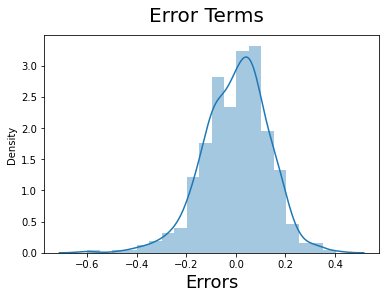

In [714]:
#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [715]:
#Checking columns
X_train_rfe14.columns

Index([                             'const',
                                       'yr',
                                  'holiday',
       'Light rain_Light snow_Thunderstorm',
                                          3,
                                          5,
                                          6,
                                          8,
                                          9,
                                         10,
                                   'Sunday',
                                          7],
      dtype='object')

In [716]:
#Scaling the test data

num_vars=['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [717]:
#Creating x and y sets

y_test = df_test.pop('cnt')
X_test = df_test

In [718]:
X_train_new=X_train_rfe14.drop(['const'], axis=1)

In [719]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [720]:
X_train_rfe14.columns

Index([                             'const',
                                       'yr',
                                  'holiday',
       'Light rain_Light snow_Thunderstorm',
                                          3,
                                          5,
                                          6,
                                          8,
                                          9,
                                         10,
                                   'Sunday',
                                          7],
      dtype='object')

In [721]:
#Making predictions on the chosen model

y_pred = lm14.predict(X_test_new)

Text(0, 0.5, 'y_pred')

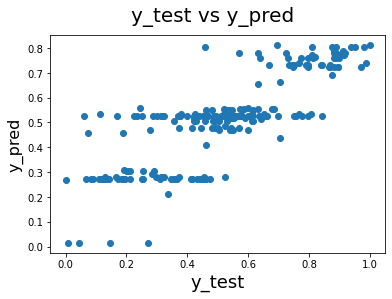

In [722]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

#### We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

In [723]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [724]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.1397587828047988

In [725]:
#Calculate the r square for test

r_squared = r2_score(y_test, y_pred)
r_squared

0.6556225740728939

In [726]:
X_t=X_train_new.iloc[:,0].values

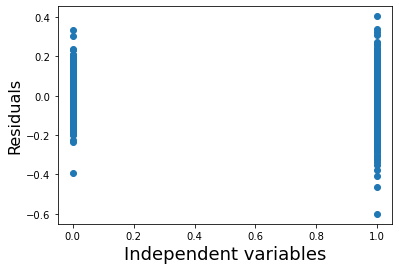

In [727]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

#### When we have time series data (e.g. yearly data), then the regression is likely to suffer from autocorrelation because demand next year will certainly be dependent on demand this year. Hence, error terms in different observations will surely be correlated with each other.

In [728]:
X_train_new.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,3,5,6,8,9,10,Sunday,7
653,1,0,0,0,0,0,0,0,1,0,0
576,1,0,0,0,0,0,0,0,0,0,1
426,1,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0,0,0,0,0,1,0


In [729]:
print(X_train_rfe14.columns)
print(lm14.summary())

Index([                             'const',
                                       'yr',
                                  'holiday',
       'Light rain_Light snow_Thunderstorm',
                                          3,
                                          5,
                                          6,
                                          8,
                                          9,
                                         10,
                                   'Sunday',
                                          7],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     88.90
Date:                Tue, 27 Dec 2022   Prob (F-statistic):          6.34e-110
Time:                        19:21:00   Lo

#### We can see that the equation for best fitted line is:

##### cnt= 0.246 X yr - 0.083 X holiday - 0.198 X Spring - 0.321 X Light rain_Light snow_Thunderstorm - 0.090 X Mist_Cloudy +0.063 X 3 + 0.123 X 5 +0.148 X 6 +0.153 X 8 + 0.193 X 9 -0.049 X Sunday + 0.126 X 7 + 0.116 X 10

#### We can see the demand for bikes depends mainly on below variables:


#### yr , holiday ,Spring, Mist_Cloudy, Light rain_Light snow_Thunderstorm,3 ,5 ,6, 8, 9, sunday, 7, 10
#### Demands increases in the month of 3, 5, 6, 8 ,9, 7 , 10 and yr
#### Demand decreases if it is holiday , Spring, Light rain_Light snow_Thunderstorm, Mist_cloudy, Sunday

#### Final recommendations for the company:

#### Demand is higher in month of 3, 5 , 6, 8, 9 ,7 and 10